# Assigment 
<strong>By: Stephanie Dominguez
Cohort 1</strong>

<b1>This first part is to import all the libraries necessary for the model
no output is needed</b1>

In [1]:
# importing libraries
import pandas as pd                                                         # data science essentials
import matplotlib.pyplot  as plt                                            # data visualization
import seaborn as sns                                                       # enhanced data visualization
import statsmodels.formula.api as smf                                       # linear regression (statsmodels)
from sklearn.model_selection import train_test_split                        # train/test split
from sklearn.linear_model import LinearRegression                           # linear regression (scikit-learn)
from sklearn.preprocessing import StandardScaler                            # standard scaler
from sklearn.linear_model import LogisticRegression                         # logistic regression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier 
# GradientBoostingClassifier logistic regression Model who gave the best result, model used in this template
from sklearn.model_selection import GridSearchCV                            # hyperparameter tuning
from sklearn.metrics import make_scorer                                     # customizable scorer
from sklearn.metrics import roc_auc_score                                   # auc score
from sklearn.ensemble import RandomForestClassifier                         # random forest
from sklearn.neighbors import KNeighborsClassifier                          # KNN for classification
from sklearn.metrics import confusion_matrix                                # confusion matrix


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file =  'Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
apprentice_chef = pd.read_excel(file)


<b1>This is a method given in class to find optimal neighbors</b1>

In [2]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=802,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 802
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

<b1>Makes no sense doing a OLS with CROSS_SELL_SUCCESS since this variable is a binary one, Yes or No.
Which and all of the R squared is 0.0 Giving us 0 insights </b1>

<b1>In this part I compared the dependet variable with everything else</b1>

In [3]:
# building a base model

# blueprinting a model type
#print("""REVENUE ~ apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE']""")
lm_price_qual = smf.ols(formula = """CROSS_SELL_SUCCESS ~ apprentice_chef['REVENUE']""",
                        data = apprentice_chef)


# telling Python to run the data through the blueprint
results = lm_price_qual.fit()


# printing the results
#print(results.summary())

columns_name_int_float = [ 'REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']
for name in columns_name_int_float:
    formula_ = f"""CROSS_SELL_SUCCESS ~ apprentice_chef['{name}']"""
    lm_price_qual = smf.ols(formula = formula_,
                        data = apprentice_chef)


    # telling Python to run the data through the blueprint
    results = lm_price_qual.fit()


    # printing the results
    #print(results.summary())
    

    

In [4]:
# OUTLIERS ANALYSIS
########################

########################
# Visual EDA (Histograms)
########################

def plot_visual_eda_histogram():
    #plot for revenue
    fig, ax = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.distplot(apprentice_chef['REVENUE'],
             bins  = 'fd',
             color = 'g')
    plt.xlabel('Revenue')

    ########################
    #plot for TOTAL_MEALS_ORDERED
    plt.subplot(2, 2, 2)
    sns.distplot(apprentice_chef['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'y')
    plt.xlabel('TOTAL_MEALS_ORDERED')

    ########################
    #plot for UNIQUE_MEALS_PURCH
    plt.subplot(2, 2, 3)
    sns.distplot(apprentice_chef['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
    plt.xlabel('UNIQUE_MEALS_PURCH')

    ########################
    #plot fot CONTACTS_W_CUSTOMER_SERVICE
    plt.subplot(2, 2, 4)
    sns.distplot(apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
    plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Histograms 1 of 6.png')


    #######################
    ########################
    #plot for PRODUCT_CATEGORIES_VIEWED
    fig, ax = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.distplot(apprentice_chef['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'g')
    plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

    ########################
    #plot for AVG_TIME_PER_SITE_VISIT
    plt.subplot(2, 2, 2)
    sns.distplot(apprentice_chef['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'y')
    plt.xlabel('AVG_TIME_PER_SITE_VISIT')

    ########################
    #plot for MOBILE_NUMBER
    plt.subplot(2, 2, 3)
    sns.distplot(apprentice_chef['MOBILE_NUMBER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
    plt.xlabel('MOBILE_NUMBER')

    ########################
    #plot fot CONTACTS_W_CUSTOMER_SERVICE
    plt.subplot(2, 2, 4)
    sns.distplot(apprentice_chef['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
    plt.xlabel('CANCELLATIONS_BEFORE_NOON')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Histograms 2 of 6.png')

    #######################
    ########################
    #plot for CANCELLATIONS_AFTER_NOON


    ########################
    #plot for TASTES_AND_PREFERENCES
    plt.subplot(2, 2, 2)
    sns.distplot(apprentice_chef['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             color = 'y')
    plt.xlabel('TASTES_AND_PREFERENCES')

    ########################
    #plot for MOBILE_LOGINS
    plt.subplot(2, 2, 3)
    sns.distplot(apprentice_chef['MOBILE_LOGINS'],
             bins  = 'fd',
             color = 'orange')
    plt.xlabel('MOBILE_LOGINS')

    ########################
    #plot fot PC_LOGINS
    plt.subplot(2, 2, 4)
    sns.distplot(apprentice_chef['PC_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
    plt.xlabel('PC_LOGINS')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Histograms 3 of 6.png')

    #######################
    ########################
    #plot for WEEKLY_PLAN
    fig, ax = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.distplot(apprentice_chef['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'g')
    plt.xlabel('WEEKLY_PLAN')

    ########################
    #plot for EARLY_DELIVERIES
    plt.subplot(2, 2, 2)
    sns.distplot(apprentice_chef['EARLY_DELIVERIES'],
             bins  = 'fd',
             color = 'y')
    plt.xlabel('EARLY_DELIVERIES')

    ########################
    #plot for LATE_DELIVERIES
    plt.subplot(2, 2, 3)
    sns.distplot(apprentice_chef['LATE_DELIVERIES'],
             bins  = 'fd',
             color = 'orange')
    plt.xlabel('LATE_DELIVERIES')

    ########################
    #plot fot PACKAGE_LOCKER
    plt.subplot(2, 2, 4)
    sns.distplot(apprentice_chef['PACKAGE_LOCKER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
    plt.xlabel('PACKAGE_LOCKER')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Histograms 4 of 6.png')

    #######################
    ########################
    
    ########################
    #plot for FOLLOWED_RECOMMENDATIONS_PCT
    plt.subplot(2, 2, 2)
    sns.distplot(apprentice_chef['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             color = 'y')
    plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

    ########################
    #plot for AVG_PREP_VID_TIME
    plt.subplot(2, 2, 3)
    sns.distplot(apprentice_chef['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             color = 'orange')
    plt.xlabel('AVG_PREP_VID_TIME')

    ########################
    #plot fot LARGEST_ORDER_SIZE
    plt.subplot(2, 2, 4)
    sns.distplot(apprentice_chef['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
    plt.xlabel('LARGEST_ORDER_SIZE')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Histograms 5 of 6.png')

    #######################
    ########################
    #plot for MASTER_CLASSES_ATTENDED
    fig, ax = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.distplot(apprentice_chef['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             color = 'g')
    plt.xlabel('MASTER_CLASSES_ATTENDED')

    ########################
    #plot for MEDIAN_MEAL_RATING
    plt.subplot(2, 2, 2)
    sns.distplot(apprentice_chef['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             color = 'y')
    plt.xlabel('MEDIAN_MEAL_RATING')

    ########################
    #plot for AVG_CLICKS_PER_VISIT
    plt.subplot(2, 2, 3)
    sns.distplot(apprentice_chef['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'orange')
    plt.xlabel('AVG_CLICKS_PER_VISIT')

    ########################
    #plot fot TOTAL_PHOTOS_VIEWED
    plt.subplot(2, 2, 4)
    sns.distplot(apprentice_chef['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
    plt.xlabel('TOTAL_PHOTOS_VIEWED')
    plt.tight_layout()
    
    
    plt.savefig('apprentice_chef Data Histograms 6 of 6.png')
#plot_visual_eda_histogram()

<b1>In this part we defined the thresholds thanks to the analysis with the histograms</b1>

In [5]:
# setting outlier thresholds
#thresholds based on graphs an quantile

TOTAL_MEALS_ORDERED_lo         = 11
TOTAL_MEALS_ORDERED_hi         = 250

UNIQUE_MEALS_PURCH_lo          = 1
UNIQUE_MEALS_PURCH_hi          = 9.5

CONTACTS_W_CUSTOMER_SERVICE_lo = 2
CONTACTS_W_CUSTOMER_SERVICE_hi = 12.5

PRODUCT_CATEGORIES_VIEWED_lo   = 1
PRODUCT_CATEGORIES_VIEWED_hi   = 10

AVG_TIME_PER_SITE_VISIT_hi     = 250

CANCELLATIONS_BEFORE_NOON_hi   = 8

EARLY_DELIVERIES_hi            = 8

LATE_DELIVERIES_hi             = 9

AVG_PREP_VID_TIME_lo           = 0
AVG_PREP_VID_TIME_hi           = 300

TOTAL_PHOTOS_VIEWED_hi         = 600

REVENUE_lo                     = 200
REVENUE_hi                     = 6000 # Data change at this point



##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers


# TOTAL_MEALS_ORDERED
apprentice_chef['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = apprentice_chef.loc[0:,'out_TOTAL_MEALS_ORDERED'][apprentice_chef['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]
condition_lo = apprentice_chef.loc[0:,'out_TOTAL_MEALS_ORDERED'][apprentice_chef['TOTAL_MEALS_ORDERED'] < TOTAL_MEALS_ORDERED_lo]

apprentice_chef['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

apprentice_chef['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# UNIQUE_MEALS_PURCH
apprentice_chef['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = apprentice_chef.loc[0:,'out_UNIQUE_MEALS_PURCH'][apprentice_chef['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]
condition_lo = apprentice_chef.loc[0:,'out_UNIQUE_MEALS_PURCH'][apprentice_chef['UNIQUE_MEALS_PURCH'] < UNIQUE_MEALS_PURCH_lo]

apprentice_chef['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

apprentice_chef['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# CONTACTS_W_CUSTOMER_SERVICE
apprentice_chef['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = apprentice_chef.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]
condition_lo = apprentice_chef.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_lo]

apprentice_chef['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

apprentice_chef['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# PRODUCT_CATEGORIES_VIEWED
apprentice_chef['out_PRODUCT_CATEGORIES_VIEWED'] = 0
condition_hi = apprentice_chef.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED'][apprentice_chef['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_hi]
condition_lo = apprentice_chef.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED'][apprentice_chef['PRODUCT_CATEGORIES_VIEWED'] < PRODUCT_CATEGORIES_VIEWED_lo]

apprentice_chef['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

apprentice_chef['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# AVG_TIME_PER_SITE_VISIT
apprentice_chef['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = apprentice_chef.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][apprentice_chef['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

apprentice_chef['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# CANCELLATIONS_BEFORE_NOON
apprentice_chef['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = apprentice_chef.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][apprentice_chef['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

apprentice_chef['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# EARLY_DELIVERIES
apprentice_chef['out_EARLY_DELIVERIES'] = 0
condition_hi = apprentice_chef.loc[0:,'out_EARLY_DELIVERIES'][apprentice_chef['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]

apprentice_chef['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# LATE_DELIVERIES
apprentice_chef['out_LATE_DELIVERIES'] = 0
condition_hi = apprentice_chef.loc[0:,'out_LATE_DELIVERIES'][apprentice_chef['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

apprentice_chef['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# AVG_PREP_VID_TIME
apprentice_chef['out_AVG_PREP_VID_TIME'] = 0
condition_hi = apprentice_chef.loc[0:,'out_AVG_PREP_VID_TIME'][apprentice_chef['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]
condition_lo = apprentice_chef.loc[0:,'out_AVG_PREP_VID_TIME'][apprentice_chef['AVG_PREP_VID_TIME'] < AVG_PREP_VID_TIME_lo]

apprentice_chef['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

apprentice_chef['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# TOTAL_PHOTOS_VIEWED_hi
apprentice_chef['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = apprentice_chef.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][apprentice_chef['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

apprentice_chef['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)



# REVENUE
apprentice_chef['out_REVENUE'] = 0
condition_hi = apprentice_chef.loc[0:,'out_REVENUE'][apprentice_chef['REVENUE'] > AVG_PREP_VID_TIME_hi]
condition_lo = apprentice_chef.loc[0:,'out_REVENUE'][apprentice_chef['REVENUE'] < REVENUE_lo]

apprentice_chef['out_REVENUE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

apprentice_chef['out_REVENUE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# Developing Trend-Based Features

<b1>In this part with visual EDA scatter plots we see how the value CROSS_SELL_SUCCESS is related to the other variables, in this case it was more challenging since the dependent variable is binary (1,0) this presented a challenge in understanding the graphs</b1>

In [6]:
# Visual EDA (Scatterplots)
########################
def plot_visual_eda_Scatterplots():
    fig, ax = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.scatterplot(x = apprentice_chef['TOTAL_MEALS_ORDERED'],
                    y = apprentice_chef['CROSS_SELL_SUCCESS'],
                    color = 'g')
    plt.xlabel('TOTAL_MEALS_ORDERED')

    ########################

    plt.subplot(2, 2, 2)
    sns.scatterplot(x = apprentice_chef['UNIQUE_MEALS_PURCH'],
                    y = apprentice_chef['CROSS_SELL_SUCCESS'],
                    color = 'y')
    plt.xlabel('UNIQUE_MEALS_PURCH')

    ########################

    plt.subplot(2, 2, 3)
    sns.scatterplot(x = apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'],
                    y = apprentice_chef['CROSS_SELL_SUCCESS'],
                    color = 'orange')
    plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

    ########################
    plt.subplot(2, 2, 4)
    sns.scatterplot(x = apprentice_chef['PRODUCT_CATEGORIES_VIEWED'],
                    y = apprentice_chef['CROSS_SELL_SUCCESS'],
                    color = 'r')
    plt.xlabel('PRODUCT_CATEGORIES_VIEWED')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Scatterplots 1 of 5.png')

    ########################
    ########################

    fig, ax = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.scatterplot(x = apprentice_chef['AVG_TIME_PER_SITE_VISIT'],
                    y = apprentice_chef['CROSS_SELL_SUCCESS'],
                    color = 'g')
    plt.xlabel('AVG_TIME_PER_SITE_VISIT')

    ########################

    plt.subplot(2, 2, 2)
    sns.scatterplot(x = apprentice_chef['CANCELLATIONS_BEFORE_NOON'],
                    y = apprentice_chef['CROSS_SELL_SUCCESS'],
                    color = 'y')
    plt.xlabel('CANCELLATIONS_BEFORE_NOON')

    ########################

    plt.subplot(2, 2, 3)
    sns.scatterplot(x = apprentice_chef['CANCELLATIONS_AFTER_NOON'],
                    y = apprentice_chef['CROSS_SELL_SUCCESS'],
                    color = 'orange')
    plt.xlabel('CANCELLATIONS_AFTER_NOON')

    ########################
    plt.subplot(2, 2, 4)
    sns.scatterplot(x = apprentice_chef['WEEKLY_PLAN'],
                    y = apprentice_chef['CROSS_SELL_SUCCESS'],
                    color = 'r')
    plt.xlabel('WEEKLY_PLAN')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Scatterplots 2 of 5.png')

    ########################
    ########################


    fig, ax = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.scatterplot(x = apprentice_chef['EARLY_DELIVERIES'],
                    y = apprentice_chef['CROSS_SELL_SUCCESS'],
                    color = 'g')
    plt.xlabel('EARLY_DELIVERIES')

    ########################

    plt.subplot(2, 2, 2)
    sns.scatterplot(x = apprentice_chef['LATE_DELIVERIES'],
                    y = apprentice_chef['CROSS_SELL_SUCCESS'],
                    color = 'y')
    plt.xlabel('LATE_DELIVERIES')

    ########################

    plt.subplot(2, 2, 3)
    sns.scatterplot(x = apprentice_chef['FOLLOWED_RECOMMENDATIONS_PCT'],
                    y = apprentice_chef['CROSS_SELL_SUCCESS'],
                    color = 'orange')
    plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

    ########################
    plt.subplot(2, 2, 4)
    sns.scatterplot(x = apprentice_chef['AVG_PREP_VID_TIME'],
                    y = apprentice_chef['CROSS_SELL_SUCCESS'],
                    color = 'r')
    plt.xlabel('AVG_PREP_VID_TIME')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Scatterplots 3 of 5.png')

    ########################
    ########################

    fig, ax = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.scatterplot(x = apprentice_chef['LARGEST_ORDER_SIZE'],
                    y = apprentice_chef['CROSS_SELL_SUCCESS'],
                    color = 'g')
    plt.xlabel('LARGEST_ORDER_SIZE')

    ########################

    plt.subplot(2, 2, 2)
    sns.scatterplot(x = apprentice_chef['MASTER_CLASSES_ATTENDED'],
                    y = apprentice_chef['CROSS_SELL_SUCCESS'],
                    color = 'y')
    plt.xlabel('MASTER_CLASSES_ATTENDED')

    ########################

    plt.subplot(2, 2, 3)
    sns.scatterplot(x = apprentice_chef['MEDIAN_MEAL_RATING'],
                    y = apprentice_chef['CROSS_SELL_SUCCESS'],
                    color = 'orange')
    plt.xlabel('MEDIAN_MEAL_RATING')

    ########################
    plt.subplot(2, 2, 4)
    sns.scatterplot(x = apprentice_chef['AVG_CLICKS_PER_VISIT'],
                    y = apprentice_chef['CROSS_SELL_SUCCESS'],
                    color = 'r')
    plt.xlabel('AVG_CLICKS_PER_VISIT')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Scatterplots 4 of 5.png')

    ########################
    ########################

    plt.subplot(2, 2, 1)
    sns.scatterplot(x = apprentice_chef['TOTAL_PHOTOS_VIEWED'],
                    y = apprentice_chef['CROSS_SELL_SUCCESS'],
                    color = 'r')
    plt.xlabel('TOTAL_PHOTOS_VIEWED')
    plt.tight_layout()
    ########################
    
    plt.subplot(2, 2, 2)
    sns.scatterplot(x = apprentice_chef['domain_group'],
                    y = apprentice_chef['CROSS_SELL_SUCCESS'],
                    color = 'g')
    plt.xlabel('domain_group')
    ########################
    plt.subplot(2, 2, 3)
    sns.scatterplot(x = apprentice_chef['TOTAL_PHOTOS_VIEWED'],
                    y = apprentice_chef['CROSS_SELL_SUCCESS'],
                    color = 'r')
    plt.xlabel('TOTAL_PHOTOS_VIEWED')
    plt.tight_layout()
    ########################
    plt.subplot(2, 2, 4)
    sns.scatterplot(x = apprentice_chef['REVENUE'],
                    y = apprentice_chef['CROSS_SELL_SUCCESS'],
                    color = 'r')
    plt.xlabel('REVENUE')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Scatterplots 5 of 5.png')
    
    
#plot_visual_eda_Scatterplots()

<b1> I created the trend based thresholds with quartile analysis </b1>

In [7]:
# setting trend-based thresholds
#thresholds based on scatter plot analisys

AVG_TIME_PER_SITE_VISIT_changes_hi      = 400 # trend changes at this point
CONTACTS_W_CUSTOMER_SERVICE_changes_hi  = 12.5  # data scatters above this point
TOTAL_PHOTOS_VIEWED_changes_hi          = 800 #data scatters above this points
UNIQUE_MEALS_PURCH_changes_hi           = 12.5
LATE_DELIVERIES_changes_hi              = 15  #data scatter at no with CROOS_SELL_SUCCESS at 15
FOLLOWED_RECOMMENDATIONS_PCT_changes_hi = 40  #data scatter at no with CROOS_SELL_SUCCESS at 40
REVENUE_changes_hi                      = 6000 # Data change at this point

TOTAL_MEALS_ORDERED_changes_at          = 300   # data inflated only in this point
CANCELLATIONS_BEFORE_NOON_changes_at    = 7   # Trend changes at this point
CANCELLATIONS_AFTER_NOON_changes_at     = 3   # Trend changes at this point
AVG_PREP_VID_TIME_changes_at            = 300 # Trend changes at this points
LARGEST_ORDER_SIZE_changes_at           = 0   # Differnet at 0 revenue of 0
AVG_CLICKS_PER_VISIT_changes_at         = 6   # trend changes before this point

##############################################################################
## Feature Engineering (trend changes)                                      ##
##############################################################################

# developing features (columns) for outliers

########################################
## change above threshold             ##
########################################

# greater than sign

# AVG_TIME_PER_SITE_VISIT
apprentice_chef['change_AVG_TIME_PER_SITE_VISIT'] = 0
condition = apprentice_chef.loc[0:,'change_AVG_TIME_PER_SITE_VISIT'][apprentice_chef['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_changes_hi]

apprentice_chef['change_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# CONTACTS_W_CUSTOMER_SERVICE
apprentice_chef['change_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = apprentice_chef.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE'][apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_changes_hi]

apprentice_chef['change_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# TOTAL_PHOTOS_VIEWED
apprentice_chef['change_TOTAL_PHOTOS_VIEWED'] = 0
condition = apprentice_chef.loc[0:,'change_TOTAL_PHOTOS_VIEWED'][apprentice_chef['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_changes_hi]

apprentice_chef['change_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# UNIQUE_MEALS_PURCH
apprentice_chef['change_UNIQUE_MEALS_PURCH'] = 0
condition = apprentice_chef.loc[0:,'change_UNIQUE_MEALS_PURCH'][apprentice_chef['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_changes_hi]

apprentice_chef['change_UNIQUE_MEALS_PURCH'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# LATE_DELIVERIES
apprentice_chef['change_LATE_DELIVERIES'] = 0
condition = apprentice_chef.loc[0:,'change_LATE_DELIVERIES'][apprentice_chef['LATE_DELIVERIES'] > LATE_DELIVERIES_changes_hi]

apprentice_chef['change_LATE_DELIVERIES'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# FOLLOWED_RECOMMENDATIONS_PCT
apprentice_chef['change_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition = apprentice_chef.loc[0:,'change_FOLLOWED_RECOMMENDATIONS_PCT'][apprentice_chef['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_RECOMMENDATIONS_PCT_changes_hi]

apprentice_chef['change_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# REVENUE
apprentice_chef['change_REVENUE'] = 0
condition = apprentice_chef.loc[0:,'change_REVENUE'][apprentice_chef['REVENUE'] > REVENUE_changes_hi]

apprentice_chef['change_REVENUE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

########################################
## change at threshold                ##
########################################

# double-equals sign

# TOTAL_MEALS_ORDERED
apprentice_chef['change_TOTAL_MEALS_ORDERED'] = 0
condition = apprentice_chef.loc[0:,'change_TOTAL_MEALS_ORDERED'][apprentice_chef['TOTAL_MEALS_ORDERED'] == TOTAL_MEALS_ORDERED_changes_at]

apprentice_chef['change_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# CANCELLATIONS_BEFORE_NOON
apprentice_chef['change_CANCELLATIONS_BEFORE_NOON'] = 0
condition = apprentice_chef.loc[0:,'change_CANCELLATIONS_BEFORE_NOON'][apprentice_chef['CANCELLATIONS_BEFORE_NOON'] == CANCELLATIONS_BEFORE_NOON_changes_at]

apprentice_chef['change_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# CANCELLATIONS_AFTER_NOON
apprentice_chef['change_CANCELLATIONS_AFTER_NOON'] = 0
condition = apprentice_chef.loc[0:,'change_CANCELLATIONS_AFTER_NOON'][apprentice_chef['CANCELLATIONS_AFTER_NOON'] == CANCELLATIONS_AFTER_NOON_changes_at]

apprentice_chef['change_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# AVG_PREP_VID_TIME
apprentice_chef['change_AVG_PREP_VID_TIME'] = 0
condition = apprentice_chef.loc[0:,'change_AVG_PREP_VID_TIME'][apprentice_chef['AVG_PREP_VID_TIME'] == AVG_PREP_VID_TIME_changes_at]

apprentice_chef['change_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# LARGEST_ORDER_SIZE
apprentice_chef['change_LARGEST_ORDER_SIZE'] = 0
condition = apprentice_chef.loc[0:,'change_LARGEST_ORDER_SIZE'][apprentice_chef['LARGEST_ORDER_SIZE'] == LARGEST_ORDER_SIZE_changes_at]

apprentice_chef['change_LARGEST_ORDER_SIZE'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)


# AVG_CLICKS_PER_VISIT
apprentice_chef['change_AVG_CLICKS_PER_VISIT'] = 0
condition = apprentice_chef.loc[0:,'change_AVG_CLICKS_PER_VISIT'][apprentice_chef['AVG_CLICKS_PER_VISIT'] == AVG_CLICKS_PER_VISIT_changes_at]

apprentice_chef['change_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)



<b1> In this part we created new variables that would make sense with the model such as: </b1>
<ul>
  <li>REVENUE_TOTAL_MEALS_ORDERED: how much each meal generates in revenue</li>
  <li>TOTAL_CANCELLATION: how much revenue is lost in each cancellation</li>
  <li>TOTAL_LOGINS: total of logins for the costumer</li>
  <li>DELIEVERY_EFFECT: the total amount of either early or late deliver affect the costumer percepetion of apprentice chef</li>
  <li>REVENUE_AVG_CLICKS_PER_VISIT: Revenue affects per clicks</li>
   <li>REVENUE_CANCELLATIONS_BEFORE_NOON: Revenue affects cancellation before noon</li>
    <li>REVENUE_CANCELLATIONS_AFTER_NOON: Revenue affects cancellation after noon</li>
</ul>

<b1> Creating new dummy variable from email: </b1>
<ul>
  <li>professional</li>
  <li>Junk</li>
  <li>Personal</li>
</ul>

In [8]:
#Creating categorical data from columns mails
#see if makes a different the type of mail
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in apprentice_chef.iterrows():
    
    # splitting email domain at ''@'
    split_email = apprentice_chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# safety measure in case of multiple concatenations
apprentice_chef_email = apprentice_chef


# renaming column to concatenate
email_df.columns = ['0' , 'personal_email_domain']


# concatenating personal_email_domain with apprentice_chef_email DataFrame
apprentice_chef_email = pd.concat([apprentice_chef_email, email_df['personal_email_domain']],
                     axis = 1)


# printing value counts of personal_email_domain
#apprentice_chef_email.loc[: ,'personal_email_domain'].value_counts()

# email domain types
personal_email_domains = ['@gmail.com',
                            '@yahoo.com',
                            '@protonmail.com']

professional_email_domains  = [  '@mmm.com',
                            '@amex.com',
                            '@apple.com',
                            '@boeing.com',
                            '@caterpillar.com',
                            '@chevron.com',
                            '@cisco.com',
                            '@cocacola.com',
                            '@disney.com',
                            '@dupont.com',
                            '@exxon.com',
                            '@ge.org' ,
                            '@goldmansacs.com',
                            '@homedepot.com',
                            '@ibm.com',
                            '@intel.com',
                            '@jnj.com',
                            '@jpmorgan.com',
                            '@mcdonalds.com',
                            '@merck.com',
                            '@microsoft.com',
                            '@nike.com',
                            '@pfizer.com',
                            '@pg.com',
                            '@travelers.com',
                            '@unitedtech.com',
                            '@unitedhealth.com',
                            '@verizon.com',
                            '@visa.com',
                            '@walmart.com']
junk_email_domains = ['@me.com',
                        '@aol.com', 
                        '@hotmail.com', 
                        '@live.com', 
                        '@msn.com', 
                        '@passport.com']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in apprentice_chef_email['personal_email_domain']:
    
    if '@' + domain in personal_email_domains:
        placeholder_lst.append('personal')
        

    elif '@' + domain in professional_email_domains:
        placeholder_lst.append('professional')
        
    elif '@' + domain in junk_email_domains:
        placeholder_lst.append('junk')


    else:
            print('Unknown')


# concatenating with original DataFrame
apprentice_chef_email['domain_group'] = pd.Series(placeholder_lst)


# checking results
apprentice_chef_email['domain_group'].value_counts()

#creating new columns for categorical data 
#adding it to original data set apprentice_chef
apprentice_chef['domain_group'] = apprentice_chef_email['domain_group']
#Creating dummy variables from email
dummy = pd.get_dummies(apprentice_chef['domain_group'])
#concat to the original dataframe
apprentice_chef = pd.concat([apprentice_chef,dummy], axis=1 )

In [9]:
#Creating new variables for the model
#no output
# REVENUE_TOTAL_MEALS_ORDERED
#Revenue for each total meals order 
apprentice_chef['REVENUE_TOTAL_MEALS_ORDERED'] = 0
apprentice_chef['REVENUE_TOTAL_MEALS_ORDERED'] = apprentice_chef['REVENUE']/apprentice_chef['TOTAL_MEALS_ORDERED']

#TOTAL_CANCELLATION
#Revenue for each total meals order 
apprentice_chef['TOTAL_CANCELLATION'] = 0
apprentice_chef['TOTAL_CANCELLATION'] = apprentice_chef['CANCELLATIONS_BEFORE_NOON']+apprentice_chef['CANCELLATIONS_AFTER_NOON']

#Revenue for each total meals order 
apprentice_chef['REVENUE_TOTAL_CANCELLATION'] = 0
apprentice_chef['REVENUE_TOTAL_CANCELLATION'] = abs(apprentice_chef['TOTAL_MEALS_ORDERED'] - apprentice_chef['TOTAL_CANCELLATION']) / apprentice_chef['REVENUE']

#DELIEVERY_EFFECT
#Sum of delivery effect on people since they are busy
apprentice_chef['DELIEVERY_EFFECT'] = 0
apprentice_chef['DELIEVERY_EFFECT'] = apprentice_chef['EARLY_DELIVERIES'] + apprentice_chef['LATE_DELIVERIES']

#TOTAL_LOGINS
#Sum of delivery effect on people since they are busy
apprentice_chef['TOTAL_LOGINS'] = 0
apprentice_chef['TOTAL_LOGINS'] = apprentice_chef['MOBILE_LOGINS'] + apprentice_chef['PC_LOGINS']

#TOTAL_LOCKER
#Sum of delivery effect on people since they are busy
apprentice_chef['TOTAL_LOCKER'] = 0
apprentice_chef['TOTAL_LOCKER'] = apprentice_chef['PACKAGE_LOCKER'] + apprentice_chef['REFRIGERATED_LOCKER']

#Variables that are not junk
#REVENUE_AVG_CLICKS_PER_VISIT
apprentice_chef['REVENUE_AVG_CLICKS_PER_VISIT'] = 0
apprentice_chef['REVENUE_AVG_CLICKS_PER_VISIT'] = apprentice_chef['AVG_CLICKS_PER_VISIT'] * apprentice_chef['REVENUE']


#Variables that are not junk
#REVENUE_CONTACTS_W_CUSTOMER_SERVICE
apprentice_chef['REVENUE_CONTACTS_W_CUSTOMER_SERVICE'] = 0
apprentice_chef['REVENUE_CONTACTS_W_CUSTOMER_SERVICE'] = apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'] * apprentice_chef['REVENUE']


#Variables that are not junk
#REVENUE_CANCELLATIONS_BEFORE_NOON
apprentice_chef['REVENUE_CANCELLATIONS_BEFORE_NOON'] = 0
apprentice_chef['REVENUE_CANCELLATIONS_BEFORE_NOON'] = apprentice_chef['CANCELLATIONS_BEFORE_NOON'] * apprentice_chef['REVENUE']


#Variables that are not junk
#REVENUE_CANCELLATIONS_AFTER_NOON
apprentice_chef['REVENUE_CANCELLATIONS_AFTER_NOON'] = 0
apprentice_chef['REVENUE_CANCELLATIONS_AFTER_NOON'] = apprentice_chef['CANCELLATIONS_AFTER_NOON'] * apprentice_chef['REVENUE']


<b1>We do a logistic regression to see what variables are necessary for the model
Comparing each variable with the dependent variable and seeing which one is better </b1>

In [10]:
# building a full model
# blueprinting a model type
apprentice_chef_data   = apprentice_chef.drop(['CROSS_SELL_SUCCESS',
                               'NAME',
                                'EMAIL',
                                'FIRST_NAME',
                                'FAMILY_NAME' ,
                                'domain_group'            
                               ],
                                axis = 1)
logit_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~
                                 CONTACTS_W_CUSTOMER_SERVICE+  
                                  PRODUCT_CATEGORIES_VIEWED+  
                                  MOBILE_NUMBER+  
                                  CANCELLATIONS_BEFORE_NOON+  
                                  CANCELLATIONS_AFTER_NOON+  
                                  TASTES_AND_PREFERENCES+  
                                  MOBILE_LOGINS+  
                                  PC_LOGINS+ 
                                  WEEKLY_PLAN+ 
                                  MASTER_CLASSES_ATTENDED+ 
                                  AVG_PREP_VID_TIME+ 
                                  FOLLOWED_RECOMMENDATIONS_PCT+ 
                                  EARLY_DELIVERIES+  
                                  PACKAGE_LOCKER+  
                                  FOLLOWED_RECOMMENDATIONS_PCT+  
                                  LARGEST_ORDER_SIZE+  
                                  MEDIAN_MEAL_RATING+  
                                  AVG_CLICKS_PER_VISIT+  
                                  out_UNIQUE_MEALS_PURCH+ 
                                  out_CONTACTS_W_CUSTOMER_SERVICE+ 
                                  REVENUE_TOTAL_MEALS_ORDERED+
                                  junk+
                                  professional
                               """,
                                data = apprentice_chef)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full.summary()

Optimization terminated successfully.
         Current function value: 0.436655
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1946
Model:                          Logit   Df Residuals:                     1923
Method:                           MLE   Df Model:                           22
Date:                Thu, 06 Feb 2020   Pseudo R-squ.:                  0.3044
Time:                        22:12:44   Log-Likelihood:                -849.73
converged:                       True   LL-Null:                       -1221.6
Covariance Type:            nonrobust   LLR p-value:                4.516e-143
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.7474      1.324     -2.075      0.038      -5.343      -0.152
CONTACTS_W_CUSTOMER_SERVICE         0.0262      0.030      0.866      0.387      -0.033       0.086
PRODUCT_CATEGORIES_VIEWED           0.0057      0.020      0.287      0.774      -0.033       0.045
MOBILE_NUMBER                       0.7822      0.177      4.419      0.000       0.435       1.129
CANCELLATIONS_BEFORE_NOON           0.2547      0.043      5.856      0.000       0.169       0.340
CANCELLATIONS_AFTER_NOON           -0.2694      0.135     -2.001      0.045      -0.533      -0.005
TASTES_AND_PREFERENCES              0.4338      0.132      3.299      0.001       0.176       0.692
MOBILE_LOGINS                       0.2248      0.104      2.160      0.031       0.021       0.429
PC_LOGINS                          -0.2834      0.114     -2.484      0.013      -0.507      -0.060
WEEKLY_PLAN                         0.0039      0.004      0.901      0.367      -0.005       0.012
MASTER_CLASSES_ATTENDED             0.0089      0.109      0.082      0.935      -0.205       0.222
AVG_PREP_VID_TIME                   0.0015      0.002      0.649      0.516      -0.003       0.006
FOLLOWED_RECOMMENDATIONS_PCT        0.0569      0.003     16.500      0.000       0.050       0.064
EARLY_DELIVERIES                    0.0409      0.027      1.539      0.124      -0.011       0.093
PACKAGE_LOCKER                      0.1386      0.128      1.086      0.278      -0.112       0.389
LARGEST_ORDER_SIZE                  0.0008      0.065      0.012      0.990      -0.127       0.129
MEDIAN_MEAL_RATING                 -0.0588      0.159     -0.369      0.712      -0.371       0.253
AVG_CLICKS_PER_VISIT               -0.0267      0.050     -0.535      0.593      -0.124       0.071
out_UNIQUE_MEALS_PURCH             -0.5109      0.575     -0.889      0.374      -1.637       0.615
out_CONTACTS_W_CUSTOMER_SERVICE    -1.1041      1.220     -0.905      0.365      -3.495       1.286
REVENUE_TOTAL_MEALS_ORDERED        -0.0043      0.004     -1.205      0.228      -0.011       0.003
junk                               -1.2316      0.153     -8.034      0.000      -1.532      -0.931
professional                        0.6472      0.141      4.577      0.000       0.370       0.924
===================================================================================================
"""

In [11]:
#############
# Ananlisys in what model is the best for the data frame
#############
def analysis_models():
    # INSTANTIATING a logistic regression model
    logreg = LogisticRegression(solver = 'lbfgs',
                                C = 1,
                                random_state = 222)


    # FITTING the training data
    logreg_fit = logreg.fit(X_train, y_train)


    # PREDICTING based on the testing set
    logreg_pred = logreg_fit.predict(X_test)


    # SCORING the results
    print('LogisticRegression')
    print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
    print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))
    from sklearn.metrics import roc_auc_score            # auc score
    # area under the roc curve (auc)
    print ('AUC',roc_auc_score(y_true  = y_test,
                  y_score = logreg_pred).round(4))



    logreg = AdaBoostClassifier()


    # FITTING the training data
    logreg_fit = logreg.fit(X_train, y_train)


    # PREDICTING based on the testing set
    logreg_pred = logreg_fit.predict(X_test)


    # SCORING the results
    print('AdaBoostClassifier')
    print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
    print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))

    # area under the roc curve (auc)
    print('auc',roc_auc_score(y_true  = y_test,
                  y_score = logreg_pred).round(4))

    # INSTANTIATING a random forest model with default values
    rf_default_full = RandomForestClassifier(n_estimators     = 18,
                                             criterion        = 'gini',
                                             max_depth        = None,
                                             min_samples_leaf = 1,
                                             bootstrap        = True,
                                             warm_start       = False,
                                             random_state     = 222)


    # FITTING the training data
    rf_default_full_fit = rf_default_full.fit(X_train, y_train)


    # PREDICTING based on the testing set
    rf_default_full_pred = rf_default_full_fit.predict(X_test)


    # SCORING the results
    print('RandomForestClassifier')
    print('Training ACCURACY:', rf_default_full_fit.score(X_train, y_train).round(4))
    print('Testing  ACCURACY:', rf_default_full_fit.score(X_test, y_test).round(4))
    print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                              y_score = rf_default_full_pred).round(4))











    opt_neighbors = optimal_neighbors(X_data = X_train,
                                      y_data = y_train,
                                     show_viz=False)







    # INSTANTIATING a KNN classification model with optimal neighbors
    knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


    # FITTING the training data
    knn_fit = knn_opt.fit(X_train, y_train)


    # PREDICTING based on the testing set
    knn_pred = knn_fit.predict(X_test)


    # SCORING the results
    print('KNeighborsClassifier')
    print('Training ACCURACY:', knn_fit.score(X_train, y_train).round(4))
    print('Testing  ACCURACY:', knn_fit.score(X_test, y_test).round(4))
    print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                              y_score = knn_pred).round(4))
#analysis_models()

<h1>Model</h1>
<b1><strong>Purpose: Seeing that adquring or not Cross sell, is correlated with taste and preference and meals rating   </strong></b1>
<b1>After seeing the model converge we created the model with GradientBoostingClassifier:</b1>
<ul>
    <li>First, we created several models to compare which one the best for a dataframe</li>
    <li>Second,Deciding with GradientBoostingClassifier we created some hyperparameter to see which one will be proper for the model  </li>
    <li>Finally, run the model</li>
    
   </ul>

In [12]:
# preparing response variable data
apprentice_chef_target = apprentice_chef.loc[:, 'CROSS_SELL_SUCCESS']
#creating the list for independent variables
x_variables = [             'REVENUE', 
                           'TOTAL_MEALS_ORDERED', 
                           'UNIQUE_MEALS_PURCH',
                           'CONTACTS_W_CUSTOMER_SERVICE',
                           'PRODUCT_CATEGORIES_VIEWED',
                           'AVG_TIME_PER_SITE_VISIT',
                           'MOBILE_NUMBER',
                           'CANCELLATIONS_BEFORE_NOON',
                           'CANCELLATIONS_AFTER_NOON', 
                           'TASTES_AND_PREFERENCES', 
                           'MOBILE_LOGINS', 
                           'WEEKLY_PLAN', 
                           'LATE_DELIVERIES', 
                           'PACKAGE_LOCKER', 
                           'FOLLOWED_RECOMMENDATIONS_PCT', 
                           'change_CONTACTS_W_CUSTOMER_SERVICE',
                           'change_FOLLOWED_RECOMMENDATIONS_PCT',
                           'change_REVENUE',
                           'REVENUE_TOTAL_MEALS_ORDERED',
                           'DELIEVERY_EFFECT',
                           'professional'
               ]

#Creating new data set with the independent variable called apprentice_chef_data
apprentice_chef_data = apprentice_chef[x_variables]

#INSTANTIATING a model object: StandardScaler()
apprentice_chef_model = StandardScaler()


# FITTING the training data
apprentice_chef_model.fit(apprentice_chef_data)


# TRANSFORMING  model
apprentice_chef_X_scaled = apprentice_chef_model.transform(apprentice_chef_data)


# converting to DataFrame
apprentice_chef_model_scaled_df = pd.DataFrame(apprentice_chef_X_scaled)

# train-test split with the scaled data
X_train, X_test, y_train, y_test = train_test_split(apprentice_chef_model_scaled_df,
                                                    apprentice_chef_target,
                                                    test_size = 0.25,
                                                    random_state = 222,
                                                    )

#Instatiang the classifier
logreg = GradientBoostingClassifier(max_depth=1, 
            subsample=0.4,
            max_features=.2,
            n_estimators=210,                                
            random_state=300,
            learning_rate=0.09)

# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)

# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)

# SCORING the results
print('GradientBoostingClassifier')
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))

# area under the roc curve (auc)
print('AUC',roc_auc_score(y_true  = y_test,
              y_score = logreg_pred).round(4))


GradientBoostingClassifier
Training ACCURACY: 0.8101
Testing  ACCURACY: 0.8255
AUC 0.8024


In [13]:
def finding_hyperparameters():
    # declaring a hyperparameter space
    learn_space     = pd.np.arange(0.1, 1.6, 0.3)
    estimator_space = pd.np.arange(50, 250, 50)
    depth_space     = pd.np.arange(1, 10)


    # creating a hyperparameter grid
    param_grid = {'learning_rate' : learn_space,
                  'max_depth'     : depth_space,
                  'n_estimators'  : estimator_space}

    # INSTANTIATING the model object without hyperparameters
    full_gbm_grid = GradientBoostingClassifier(random_state = 222)

    # GridSearchCV object
    full_gbm_cv = GridSearchCV(estimator  = full_gbm_grid,
                               param_grid = param_grid,
                               cv         = 3,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))

    # FITTING to the FULL DATASET (due to cross-validation)
    full_gbm_cv.fit(apprentice_chef_model_scaled_df, apprentice_chef_target)

    # PREDICT step is not needed

    # printing the optimal parameters and best score
    print("Tuned Parameters  :", full_gbm_cv.best_params_)
    print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))
#finding_hyperparameters()

<h1>Confusion matrix</h1>
<b1>In order to validate our model we create an confusion matrix, that would determine if our model can detect false positive, true positives, true negatives and false negatives</b1>

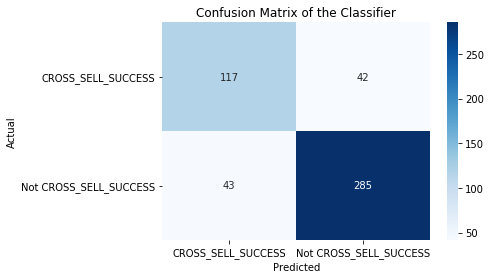

In [14]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['CROSS_SELL_SUCCESS', 'Not CROSS_SELL_SUCCESS'])

The model can detect with precision if the costumer is going to get the cross sell